In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal
import scipy as sp
import cmath
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


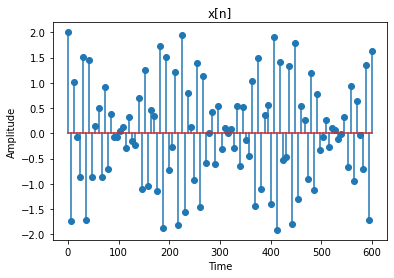

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


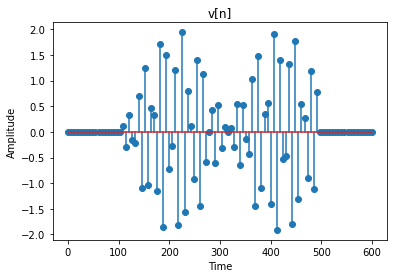

In [52]:
#x[n] and w[n]

#w0 = 2*np.pi/6
#w1 = 2*np.pi/3
w0 = 2*np.pi/14
w1 = 2*np.pi/15
A1 = 1
A2 = 1
L = 64#Lto be preferably even

f0 = w0/2*np.pi #frequency of first component
f1 = w1/2*np.pi #frequency of second component

fs = 100 #sampling frequency

n = np.linspace(0,600,fs)#discrete time axis

xn = A1*np.cos(w0*n) + A2*np.cos(w1*n)

plt.stem(n, xn)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('x[n]')
plt.show()#used to separately view plots

wn = np.ones(L)
m = int((len(xn)-L)/2)
wn = np.append(np.zeros(m),wn)
wn = np.append(wn,np.zeros(m))
#print(len(xn))
#print(len(wn))
vn = wn*xn

plt.stem(n, vn)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('v[n]')
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


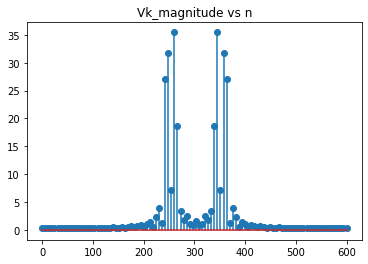

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


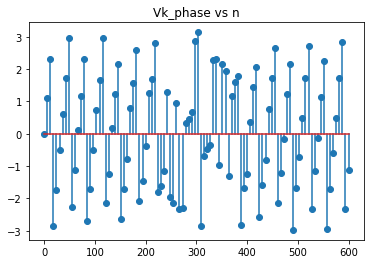

In [53]:
#DFT of v[n]

def DFT(x): #function for DFT
    x = np.array(x)
    N = len(x)
    n = np.arange(0,N,1)
    nt = n.reshape((N, 1)) #taking transpose for dot product later
    e = np.exp(-2j * np.pi * nt * n / N) #each term summation
    Xk = np.dot(e, x) #second summation to get final array(DFT) of X[n]     
    return Xk


#input signal
xn = vn
Xk = DFT(xn)
g=len(Xk)

Xk_magnitude = []
Xk_phase = []
for i in range(g):
        Xk_magnitude.append(np.linalg.norm(Xk[i]))
        Xk_phase.append(cmath.phase(Xk[i]))


      
plt.stem(n,Xk_magnitude)
plt.title("Vk_magnitude vs n")
plt.show()
plt.stem(n,Xk_phase)
plt.title("Vk_phase vs n")
plt.show()



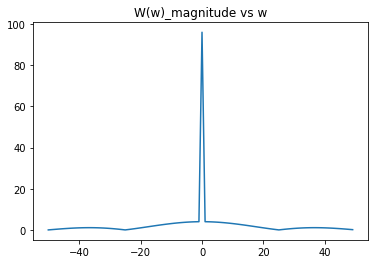

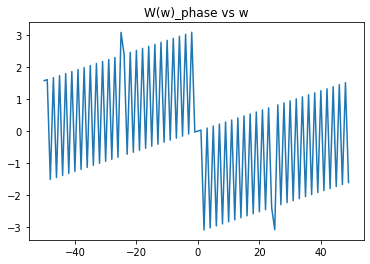

In [45]:
#Fast Convolutuon
#DTFT of w[n]






#g=np.arange(0,100,1)#for 0 to 2pi DTFT
g=np.arange(-50,50,1)#for -pi to pi DTFT
H=wn
#length of array=l, (l-point sequence)
l=len(H)
p=0
q=0
if(l%2==0):
  p=-1*(int(l/2))
  q=(int(l/2))
  n=np.arange(p,q,1)
else:
  p=-1*(int((l-1)/2))
  q=-1*p
  n=np.arange(p,q+1,1)
Xw=[None]*len(g)

for m in g:
  sum=0
  for k in n:
    sum=sum+H[k+q]*np.exp((-1)*2j*np.pi*0.01*k*m)
  #Xw[m]=sum
  Xw[m+50]=sum #for -pi to pi

Xw_magnitude = []
Xw_phase = []
for i in range(len(g)):
        Xw_magnitude.append(np.linalg.norm(Xw[i]))
        Xw_phase.append(cmath.phase(Xw[i]))
        
plt.plot(g,Xw_magnitude)
plt.title("W(w)_magnitude vs w")
plt.show()
plt.plot(g,Xw_phase)
plt.title("W(w)_phase vs w")
plt.show()

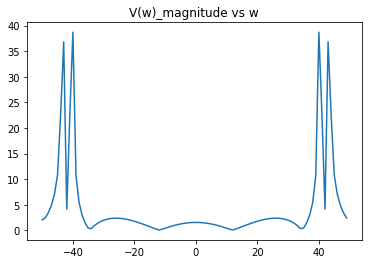

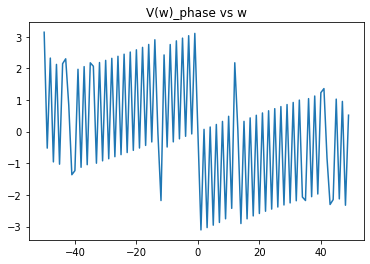

In [46]:
#Fast Convolutuon
#DTFT of v[n]






#g=np.arange(0,100,1)#for 0 to 2pi DTFT
g=np.arange(-50,50,1)#for -pi to pi DTFT
H=vn
#length of array=l, (l-point sequence)
l=len(H)
p=0
q=0
if(l%2==0):
  p=-1*(int(l/2))
  q=(int(l/2))
  n=np.arange(p,q,1)
else:
  p=-1*(int((l-1)/2))
  q=-1*p
  n=np.arange(p,q+1,1)
Xw=[None]*len(g)

for m in g:
  sum=0
  for k in n:
    sum=sum+H[k+q]*np.exp((-1)*2j*np.pi*0.01*k*m)
  #Xw[m]=sum
  Xw[m+50]=sum #for -pi to pi

Xw_magnitude = []
Xw_phase = []
for i in range(len(g)):
        Xw_magnitude.append(np.linalg.norm(Xw[i]))
        Xw_phase.append(cmath.phase(Xw[i]))
        
plt.plot(g,Xw_magnitude)
plt.title("V(w)_magnitude vs w")
plt.show()
plt.plot(g,Xw_phase)
plt.title("V(w)_phase vs w")
plt.show()

ws =  0.031415926535897934


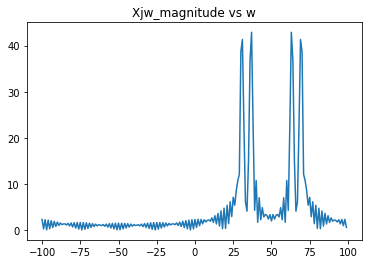

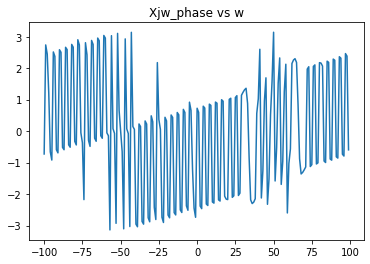

In [47]:
#CTFT of x(t)

Ts=200
ws=(2*np.pi)/Ts
print("ws = ", ws)




g=np.arange(-100,100,1)#for -2pi to 2pi CTFT

H=xn
#length of array=l, (l-point sequence)
l=len(H)
p=0
q=0
if(l%2==0):
  p=-1*(int(l/2))
  q=(int(l/2))
  n=np.arange(p,q,1)
else:
  p=-1*(int((l-1)/2))
  q=-1*p
  n=np.arange(p,q+1,1)
Xjw=[None]*len(g)

for m in g:
  sum=0
  for k in n:
    sum=sum+H[k+q]*np.exp((-1)*2j*np.pi*(1/Ts)*k*m)
  Xjw[m+50]=sum 

Xjw_magnitude = []
Xjw_phase = []
for i in range(len(g)):
        Xjw_magnitude.append(np.linalg.norm(Xjw[i]))
        Xjw_phase.append(cmath.phase(Xjw[i]))
        
plt.plot(g,Xjw_magnitude)
plt.title("Xjw_magnitude vs w")
plt.show()
plt.plot(g,Xjw_phase)
plt.title("Xjw_phase vs w")
plt.show()



In [ ]:
#Inferences:

"""
1)Number of peaks decreases as w decreases

2)On changing L, the output spectrum remains same given the periodicity 

3)On changing N, nothing much changes, you just get more sample of the continuous DTFT

4)YES, because DFT is just a sampled version of the DTFT, where DFT is discrete and DTFT is continous 

5)Yes, because V(w) is the time domain sampled and time limited version of the analog signal X(w)

In [54]:
#STFT
fs = 1000 #sampling frequency
n = np.linspace(0,600,fs)#discrete time axis

w0 = 2*np.pi*7.5/1000000
yn = np.cos(w0*n*n)
L=100
#rectangular window

r = len(yn)-L
wn = np.ones(r)
#wn = np.append(np.zeros(m),wn)
#wn = np.append(wn,np.zeros(m))


g=np.arange(0,10,1)#for 0 to 2pi STFT#lambda=frequency
d=np.pi/4#frequency instance
N=np.arange(0,100,1)
H=yn
#length of array=l, (l-point sequence)
l=r
p=0
q=0
if(l%2==0):
  p=-1*(int(l/2))
  q=(int(l/2))
  s=np.arange(p,q,1)
else:
  p=-1*(int((l-1)/2))
  q=-1*p
  s=np.arange(p,q+1,1)
Xk=[[0]*len(N)]*len(g)
Y=[0]*len(N)
"""
for k in g:

  for n in N:
    sum=0
    for m in s:
      sum=sum+H[n+m]*wn[m]*np.exp((-1)*2j*k*m*np.pi*0.01)
    #Xw[m]=sum
    Y[n]=sum
  #Xk.append(Y)
"""
"""
for n in N:
  sum=0
  for m in s:
    print(H[n+m])
    print(wn[m])
     #print(H[n+m])
     #print(H[n+m])
    sum=sum+H[n+m]*wn[m]*np.exp((-1)*2j*k*m*np.pi*0.01)
    print(sum)
   #Xw[m]=sum
  Y[n]=sum
     #Xk.append(Y)
"""
for k in g:

  for n in N:
    sum=0
    for m in s:
      sum=sum+H[n+m]*wn[m]*np.exp((-1)*2j*k*m*np.pi*0.01)
    #Xw[m]=sum
    Y[n]=sum
  Xk.append(Y)
#print(N)
#print(yn)
#print(l)
#print(r)
#print(s)
#print(H)
print(Y)
print(Xk)


#Xk is STFT
#2D image
"""
plt.imshow(Xk)
plt.show()
"""





[(0.09781246039616776+0.16382071929856434j), (1.1530000030849636+0.9257410443906093j), (1.6460464827451489+2.1410364397832686j), (1.4212308922731243+3.437728335219243j), (0.5463837343502442+4.418301548189074j), (-0.7082304580748398+4.783464539954659j), (-1.9540572575891222+4.425328346440402j), (-2.8052253506110043+3.4609934710986288j), (-2.9986841804279503+2.196087659238899j), (-2.476102073316643+1.0296068565255265j), (-1.402026345945074+0.32968656453737j), (-0.11265135145805216+0.31898145708668285j), (0.9888547660688549+1.0053396452384715j), (1.557875205652494+2.1793557551309086j), (1.41564001526974+3.4795646556522275j), (0.6048861409966086+4.504978152473354j), (-0.6234474118256415+4.939927009374981j), (-1.888346922289942+4.652339466162315j), (-2.797349311771921+3.7348578138333997j), (-3.068732205463731+2.4759916240932527j), (-2.6192255374981483+1.2702889086261875j), (-1.5899362052403845+0.49549289430704563j), (-0.3024142839548619+0.39493093584636896j), (0.8414606705081212+1.001753091

'\nplt.imshow(Xk)\nplt.show()\n'

In [ ]:
#Practical EXperiment and STFT Inferences
"""
Periodogram:
Periodogram gives us the spectral power density of the signal, i.e the amount of power in a specific range. We can see what range of the signal is of neglible power through a periodogram.





Human frequency:

From 0 to 0.2 , the power is concentrated and the power goes down to upto -140 dB for the next frequency components.


"""

In [ ]:
#Filter Inferences
#Common Questions
"""
1.
ANSWER: Chebyshev type 1 and 2 gave the lowest order of the filter. The order of a filter also indicates the minimum number of components that the filter will require, making it of less cost

2.
Kaiser window gives us filter design of the order 37, which is very high when compared to the IIR filter designs.
3.
            ANSWER  For implementation, we use IIR filter design since it has comparably lower order of filter design, butpractically they might me tough to realise given the non-causality aspect
4.
            ANSWER FIR impulse response is absolutely summable, since it is a finite valued response, whereas IIR impulse response might not be absolutely summable and thus might lead to unstability
5.
            ANSWER FIR group delay is constant, whereas the IIR group delay is not constant and peaks at an instant. If constant group delay is required, we should use FIR filter only.


"""

In [ ]:
#Specific Filter inferences
"""
FIR Window:
Stop band attenuation is -40dB and the transition lobe width is 0.2, so the kaiser window length will be,
     
so by substituting the values we get,
n = 23.28 ~ 23, which is obtained by the filterDesigner function also.


FIR Min-max:
We can observe that there are 23 zeroes and 1 pole at 0 of order 23. We can verify that there are no poles outside the unit circle, which confirms  that the system is stable, and there is no constraint of unit circle for the zeros.
We can observe that we obtain 0dB magnitude in passband, with the ripple provided and in the stop band the gain is attenuated to  -40dB.
Our phase plot is piecewise linear, as expected with discontinuties at 5 points.
"""
